In [1]:
import pandas as pd

import numpy as np

In [2]:
train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')

In [4]:
y=train.label
X=train.drop('label',axis=1)

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
y_cat = to_categorical(y)

In [7]:
y_cat.shape

(42000, 10)

In [8]:
#normalisation
X_1= X/255

test_1= test/255

In [9]:
X_1.shape,test_1.shape

((42000, 784), (28000, 784))

In [10]:
X_train = np.array(X_1).reshape(42000,28,28,1)

X_test = np.array(test_1).reshape(28000,28,28,1)


In [11]:
from tensorflow.keras.models import Sequential

In [12]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(filters=32,kernel_size = (4,4),input_shape=(28,28,1),activation='relu'))

model.add(MaxPool2D())

model.add(Flatten()) #flattening the image after convo and pooling 

model.add(Dense(128, activation='relu'))

model.add(Dense(10,activation='softmax')) #multiclass softmax

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
early = EarlyStopping(monitor='accuracy',patience=2)

In [23]:
model.fit(X_train,y_cat,epochs=25)

Epoch 1/25
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0042 - accuracy: 0.9986
Epoch 2/25
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0034 - accuracy: 0.9991
Epoch 3/25
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0039 - accuracy: 0.9986
Epoch 4/25
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0037 - accuracy: 0.9990
Epoch 5/25
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0040 - accuracy: 0.9989
Epoch 6/25
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0026 - accuracy: 0.9991
Epoch 7/25
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0021 - accuracy: 0.9994
Epoch 8/25
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0036 - accuracy: 0.9988
Epoch 9/25
1313/1313 [==============================] - 14s 10ms/step - loss: 0.0029 - accuracy: 0.9990
Epoch 10/25
1313/1313 [==============================] - 14s 11ms/s

In [24]:
predicted = model.predict_classes(X_test)

In [25]:
predicted

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [26]:
sub = pd.read_csv('sample_submission.csv')

In [27]:
sub['Label'] = predicted

In [28]:
sub.to_csv('vk_submission_three.csv',index=False) #0.98742

In [30]:
import os

In [32]:
import tensorflow as tf
import os

MODEL_DIR = os.getcwd()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model')


export_path = C:\Users\IT\Downloads\digit-recognizer\1

INFO:tensorflow:Assets written to: C:\Users\IT\Downloads\digit-recognizer\1\assets

Saved model


In [45]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

# load the image
img = load_img('new_test_/2.png')
print("Orignal:" ,type(img))

img=img.resize((28, 28)) #converting to 28*28
# convert to numpy array
img_array = img_to_array(img)
print("NumPy array info:") 
print(type(img_array))    

print("type:",img_array.dtype)
print("shape:",img_array.shape)
# convert back to image

img_pil = array_to_img(img_array)
print("converting NumPy array:",type(img_pil))

Orignal: <class 'PIL.PngImagePlugin.PngImageFile'>
NumPy array info:
<class 'numpy.ndarray'>
type: float32
shape: (28, 28, 3)
converting NumPy array: <class 'PIL.Image.Image'>


In [46]:
from matplotlib import pyplot as plt

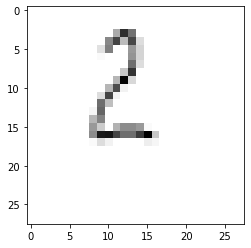

In [47]:
plt.imshow(img_pil)